In [31]:
# Load pyspark, pandas
from pyspark import SparkConf, SparkContext
import pandas as pd

In [32]:
# Configure Spark
conf = SparkConf().setMaster("local").setAppName("uber-date-trips")
sc = SparkContext(conf=conf)

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=uber-date-trips, master=local) created by __init__ at C:\Users\user\AppData\Local\Temp\ipykernel_18284\2691578893.py:3 

In [33]:
# Dataset sample
filename = "fhvhv_tripdata_2020-03_short.csv"

In [34]:
# Data parsing
lines = sc.textFile("./data/" + filename)   # .csv -> RDD object
header = lines.first()
filtered_lines = lines.filter(lambda row:row != header) # all lines excepting the header

In [35]:
"""
    Run the Spark job
    - map(): apply the transformation on every element of RDD -> new RDD
    - countByValue(): action that returns the count of each unique value
    - x.split(", ")[2]: extract the value of pickup_datetime from a row
    e.g., 2020-03-01 00:03:40
    - .split(" ")[0]: extract the date from the pickup_datetime
    e.g., 2020-03-01
"""

dates = filtered_lines.map(lambda x: x.split(",")[0])
result = dates.countByValue()

In [36]:
# Save results as a csv file
pd.Series(result, name="trips").to_csv("./data/trips_date.csv")

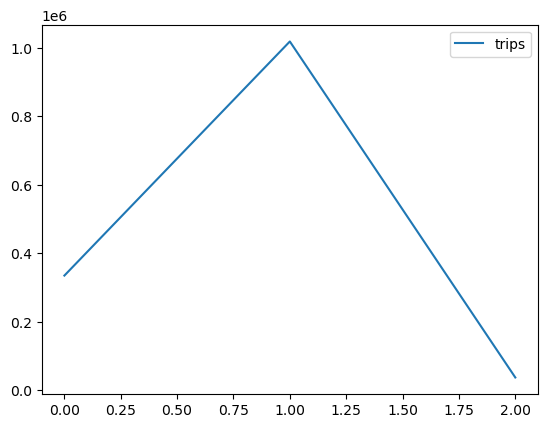

In [37]:
# Visualize the results
import matplotlib.pyplot as plt

trips = pd.read_csv("./data/trips_date.csv")
trips.plot()
plt.show()

In [38]:
trips.head()

,Unnamed: 0,trips
0,HV0005,334476
1,HV0003,1019209
2,HV0004,36395


In [39]:
trips.loc[3] = ["HV0002", 0]
trips.head()

,Unnamed: 0,trips
0,HV0005,334476
1,HV0003,1019209
2,HV0004,36395
3,HV0002,0


In [40]:
trips=trips.sort_values('Unnamed: 0')
trips.head()

,Unnamed: 0,trips
3,HV0002,0
1,HV0003,1019209
2,HV0004,36395
0,HV0005,334476


In [41]:
trips['Unnamed: 0'].sort_values()

3    HV0002
1    HV0003
2    HV0004
0    HV0005
Name: Unnamed: 0, dtype: object

In [42]:
trips = trips.reset_index(drop=True,inplace=False)
trips.head()

,Unnamed: 0,trips
0,HV0002,0
1,HV0003,1019209
2,HV0004,36395
3,HV0005,334476


In [43]:
trips = trips.rename(columns = {'Unnamed: 0' : 'hvfhs_license_num'})
trips.head()

,hvfhs_license_num,trips
0,HV0002,0
1,HV0003,1019209
2,HV0004,36395
3,HV0005,334476


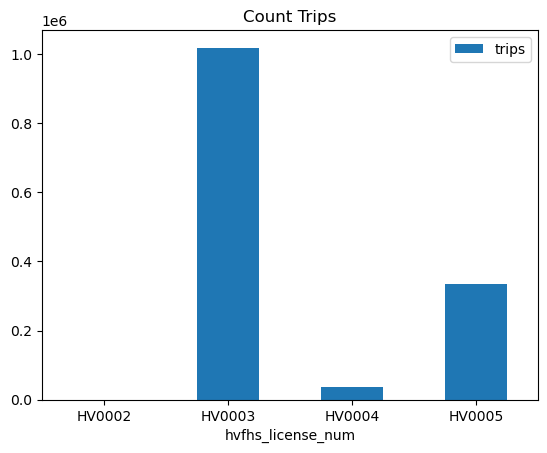

In [44]:
trips.plot(kind = 'bar', x = "hvfhs_license_num", y = "trips", xlabel = "hvfhs_license_num", title = "Count Trips")
plt.xticks(rotation=0)
plt.show()